# BL40A2030 Wireless Communication Networks

## Final work

### Author: Jaime Arturo Álvarez Orgaz

**The goal of the final work is to compute the Transmission Capacity (i.e. the highest achievable Spatial Throughput considering a maximum acceptable outage probability constraint), also considering aspects related to queue stability. The final work will be step-by-step.**

Consider a bipolar network similar to the one presented in weeks 6 and 7, but now considering a slotted-ALOHA-style of medium access. 

- Network density $\lambda>0$
- Path-loss exponent $\alpha>2$
- Rayleigh fading, leading to a constant $\kappa$
- SIR threshold $\beta>0$
- TX-RX distance $d\geq1$
- Slotted Aloha access probability (independent for individual TXs): $p$
- Outage probability = 1 - success probability: $1 - e^{- \kappa p \lambda \pi d^2 \beta^{2/\alpha}} = 1 - P_s$
- Spatial throughput: $p \times \lambda \times  P_s \times \log_2(1+\beta)$
- Maximum acceptable outage probability: $\epsilon$

*Note: When the slotted-ALOHA-style MAC is used, the original Poisson point process is thinned and the process of active transmitters in the networks becomes $p\lambda$ active nodes per square-meter.*

(A)  Plot: $p \times \lambda \times  P_s \times \log_2(1+\beta)$ in terms of the access probability $p$, considering that $P_s = 1-\epsilon$. Assume: $\alpha=4$, $d=1$, $\epsilon = 0.05$ and $\lambda=0.02$.

*Hint: First proceed with the algebraic manipulation of $P_s = 1-\epsilon$ to find the value of $\beta$ as a function of the other variables. Then, you ended up in a new equation.*

(B) Find the value of $p$ that optimizes the spatial throughput.

*Hint: It might be possible that sympy cannot find the equation analytically so a numerical solution is also acceptable (see tutorial from week 7).*

(C) Test the result from (B) using the numerical values from (A) by making the plot including the optimal spatial throuhgput value. Verify also for $\lambda=0.01$ and $\lambda=0.025$.

(D) What is the transmission capacity of this network (i.e. the maximum achievable spatial throughput)? 

(E) Consider that the TXs have one queue where packets arrive at each time slot with a given probability $q$ (Bernoulli arrivals). What is the necessary relation between $p$ and $q$ that guarantees queue stability (i.e. the queue size is not growing to infinity with time). To answer this question you need to simulate this queue considering 3 conditions (i) $q<p$ by setting $q = p - 0.1$, (ii) $q=p$ and (iii) $q>p$ by setting $q = p + 0.1$ for the value of $p$ found in (B) for 10000 time-slots (time-steps) and evaluate the worst case delay.

*Hint: The packets will arrive with probability $q$ each time slot, while packets will leave with probability $p$ (similar to thowning a coin experiment with biased probability). This queue is similar to the "naive" simple queue approach taken in week 1 but now with Bernoulli arrivals and departures. To generate a sequence of Bernoulli, you can use the Binomial random number generator (numpy.random.binomial).*

(F) Write a short comment about what would you expect to happen with the queue of the TXs if:

- Restransmissions are allowed
- CSMA protocol is used
- Queues have a limited size


In [1]:
import sympy as sp
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt
import math
import queue
import copy
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**A**

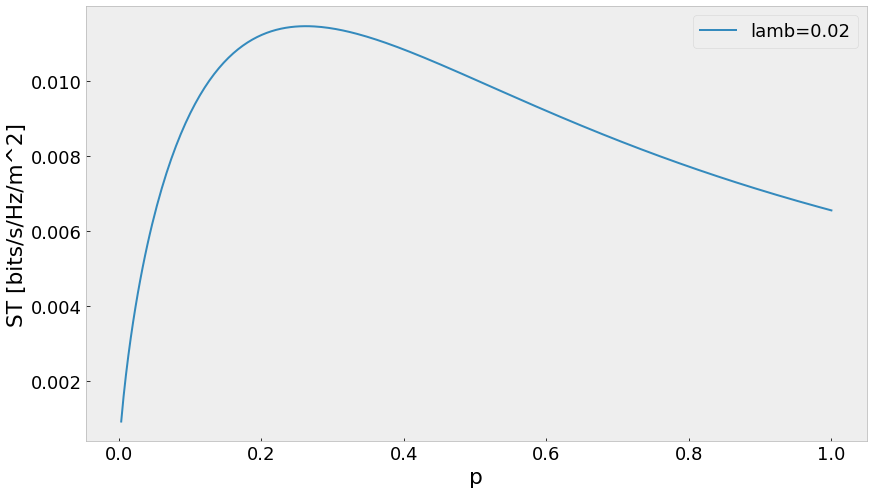

In [2]:
e=0.05
Ps = 1-e
alpha = 4
d =1
lamb = 0.02
p = np.linspace(0,1,300)

kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
Beq = ((np.log(1 - e))/(-(kappa * p * lamb * np.pi * d**2)))**(alpha/2)
ST = p * lamb * Ps * np.log2(1 + (Beq))

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

plt.plot(p, ST, '-' , label=r'lamb=0.02')

plt.xlabel("p")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

**B**

In [3]:
sp.init_printing()
#Defining variables
d2, lamb2, beta2, alpha2, kappa2, e2, ps2, p2 = sp.symbols('d lambda beta alpha kappa e Ps p', real = True, positive = True)

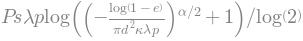

In [4]:
#Beta Equation
Beq2 = ((sp.log(1 - e2))/(-(kappa2 * p2 * lamb2 * sp.pi * d2**2)))**(alpha2/2)

#Success
SucP = p2 * lamb2 * ps2 * sp.log(1+Beq2, 2)

SucP

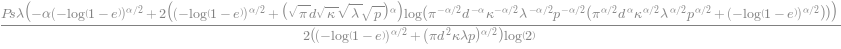

In [5]:
IE_dif = sp.simplify(sp.diff(SucP,p2))
IE_dif

In [6]:
sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d).subs(e2,e).subs(ps2,Ps),p2,0.2)

**C**

0.262441050926558
0.524882101853116
0.209952840741247


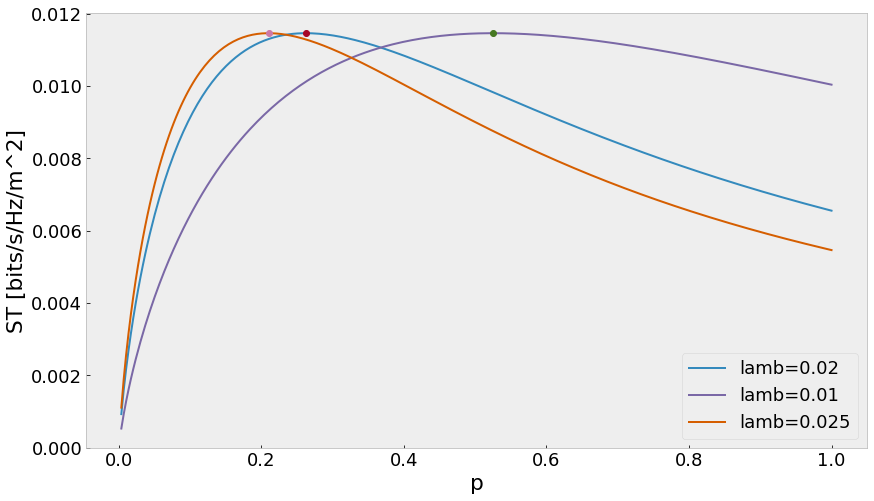

In [7]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

#Lambda = 0.02
lamb = 0.02
p_optimal_np_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d).subs(e2,e).subs(ps2,Ps),p2,0.2)
p_optimal_np = sp.lambdify([],p_optimal_np_aux,"numpy")
print(p_optimal_np())

Beq = ((np.log(Ps))/(-(kappa * p * lamb * np.pi * d**2)))**(alpha/2)
ST = p * lamb * Ps * np.log2(1 + (Beq))


Beq_op = ((np.log(Ps))/(-(kappa * p_optimal_np() * lamb * np.pi * d**2)))**(alpha/2)
ST_op = p_optimal_np() * lamb * Ps * np.log2(1 + (Beq_op))

plt.plot(p, ST, '-' , label=r'lamb=0.02')
plt.plot(p_optimal_np(), ST_op, 'o')


#Lambda = 0.01
lamb = 0.01
p_optimal_np_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d).subs(e2,e).subs(ps2,Ps),p2,0.2)
p_optimal_np = sp.lambdify([],p_optimal_np_aux,"numpy")
p_optimal_np

Beq = ((np.log(Ps))/(-(kappa * p * lamb * np.pi * d**2)))**(alpha/2)
ST = p * lamb * Ps * np.log2(1 + (Beq))


Beq_op = ((np.log(Ps))/(-(kappa * p_optimal_np() * lamb * np.pi * d**2)))**(alpha/2)
ST_op = p_optimal_np() * lamb * Ps * np.log2(1 + (Beq_op))

plt.plot(p, ST, '-' , label=r'lamb=0.01')
plt.plot(p_optimal_np(), ST_op, 'o')
print(p_optimal_np())

#Lambda = 0.025
lamb = 0.025
p_optimal_np_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d).subs(e2,e).subs(ps2,Ps),p2,0.2)
p_optimal_np = sp.lambdify([],p_optimal_np_aux,"numpy")
p_optimal_np

Beq = ((np.log(Ps))/(-(kappa * p * lamb * np.pi * d**2)))**(alpha/2)
ST = p * lamb * Ps * np.log2(1 + (Beq))


Beq_op = ((np.log(Ps))/(-(kappa * p_optimal_np() * lamb * np.pi * d**2)))**(alpha/2)
ST_op = p_optimal_np() * lamb * Ps * np.log2(1 + (Beq_op))

plt.plot(p, ST, '-' , label=r'lamb=0.025')
plt.plot(p_optimal_np(), ST_op, 'o')
print(p_optimal_np())

plt.xlabel("p")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

**D**

In [8]:
#ST_op from lambda = 0.025
max_st_op = ST_op
print(max_st_op)

0.011464255080332308


**E**

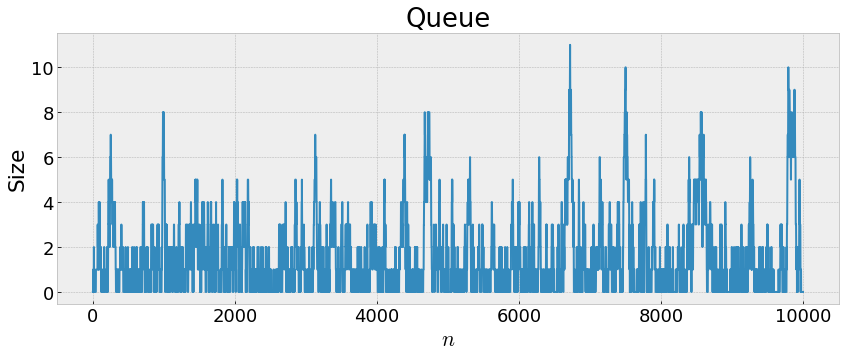

In [22]:
##ARRIVAL < SERVICE RATE

#time periods
size=10000
#Arrival
lamb = 0.02
p_optimal_np_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d).subs(e2,e).subs(ps2,Ps),p2,0.2)
p_optimal_np = sp.lambdify([],p_optimal_np_aux,"numpy")
mean = p_optimal_np() - 0.1
arrival = np.random.binomial(1, mean, size)
#Service
mean = p_optimal_np()
service = np.random.binomial(1, mean, size)
#
queue = np.zeros(size+1)

counter = 0

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])
    if queue[i] == 0:
        counter = counter + 1


plt.figure(figsize=(14,5))
plt.plot( queue )
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
plt.grid(True) #grid
plt.show() 

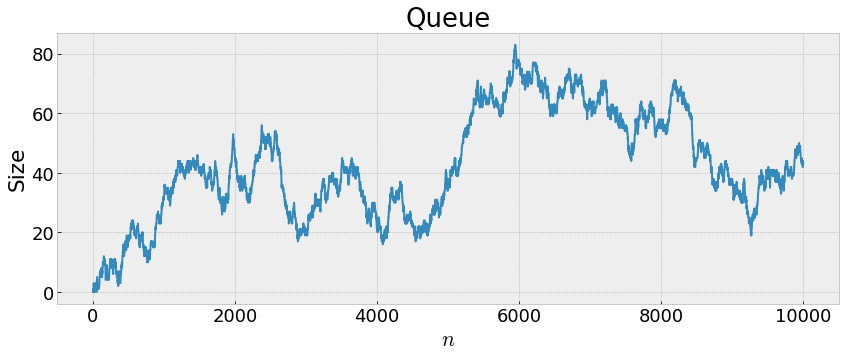

In [23]:
##ARRIVAL == SERVICE RATE

#time periods
size=10000
#Arrival
lamb = 0.02
p_optimal_np_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d).subs(e2,e).subs(ps2,Ps),p2,0.2)
p_optimal_np = sp.lambdify([],p_optimal_np_aux,"numpy")
mean = p_optimal_np()
arrival = np.random.binomial(1, mean, size)
#Service
service = np.random.binomial(1, mean, size)
#
queue = np.zeros(size+1)

counter = 0

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])
    if queue[i] == 0:
        counter = counter + 1


plt.figure(figsize=(14,5))
plt.plot( queue )
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
plt.grid(True) #grid
plt.show() 

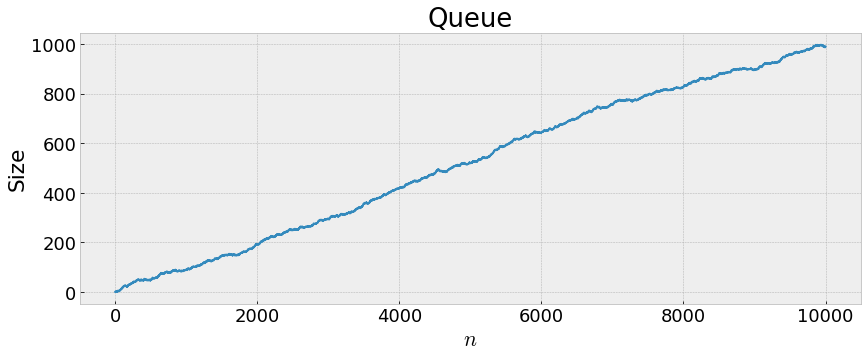

In [24]:
##ARRIVAL > SERVICE RATE
#time periods
size=10000
#Arrival
lamb = 0.02
p_optimal_np_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d).subs(e2,e).subs(ps2,Ps),p2,0.2)
p_optimal_np = sp.lambdify([],p_optimal_np_aux,"numpy")

mean = p_optimal_np() + 0.1
arrival = np.random.binomial(1, mean, size)
#Service
mean = p_optimal_np()
service = np.random.binomial(1, mean, size)

#
queue = np.zeros(size+1)

counter = 0

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])
    if queue[i] == 0:
        counter = counter + 1


plt.figure(figsize=(14,5))
plt.plot( queue )
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
plt.grid(True) #grid
plt.show() 

**F**

**Restransmissions are allowed:** Packets that fail will be dropped and the queue will be increased.
    
**CSMA protocol is used:** CSMA verifies if there is a transmission in the medium. This means that in this case, the throughput will be higher since it will be waiting until the medium is free.
    
**Queues have a limited size:** Having a queue limit will drop packages. New coming packages will be dropped if the queue is at it's maximum limit.